# 이미지로 연습하는 numpy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


`PIL` 모듈은 이미지를 제어할 수 있는 기능을 제공합니다. `open` 함수로 저장된 이미지 데이터를 읽어 올 수 있습니다. img에는 `PngImageFile` 객체가 저장됩니다. 

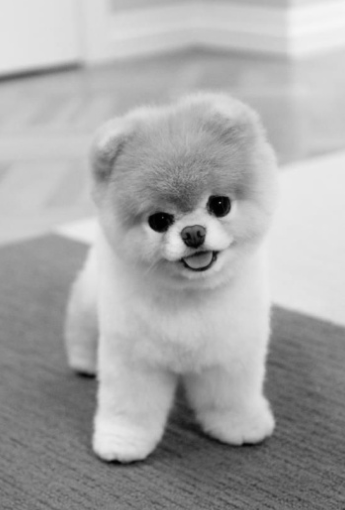

In [114]:
from PIL import Image
img = Image.open("/content/drive/MyDrive/001 Work/001_02 실습조교_패스트캠퍼스B2B/220516_교보생명/강의자료/data/0.png")
img = img.convert('L')
img

In [149]:
help(Image)

Help on module PIL.Image in PIL:

NAME
    PIL.Image

DESCRIPTION
    # The Python Imaging Library.
    # $Id$
    #
    # the Image class wrapper
    #
    # partial release history:
    # 1995-09-09 fl   Created
    # 1996-03-11 fl   PIL release 0.0 (proof of concept)
    # 1996-04-30 fl   PIL release 0.1b1
    # 1999-07-28 fl   PIL release 1.0 final
    # 2000-06-07 fl   PIL release 1.1
    # 2000-10-20 fl   PIL release 1.1.1
    # 2001-05-07 fl   PIL release 1.1.2
    # 2002-03-15 fl   PIL release 1.1.3
    # 2003-05-10 fl   PIL release 1.1.4
    # 2005-03-28 fl   PIL release 1.1.5
    # 2006-12-02 fl   PIL release 1.1.6
    # 2009-11-15 fl   PIL release 1.1.7
    #
    # Copyright (c) 1997-2009 by Secret Labs AB.  All rights reserved.
    # Copyright (c) 1995-2009 by Fredrik Lundh.
    #
    # See the README file for information on usage and redistribution.
    #

CLASSES
    builtins.Exception(builtins.BaseException)
        DecompressionBombError
    builtins.RuntimeWarning(buil

- L : 흑백
- RGB : Red, Green, Blue 삼원색을 이용한 색 표현

`transpose` 메서드로 `flip`할 수있음

In [ ]:
img.transpose

<bound method Image.transpose of <PIL.Image.Image image mode=L size=345x510 at 0x7F7F75E95510>>

`PngImageFile` 객체를 `ndarray`로 변환

In [ ]:
import numpy as np

arr = np.array(img)
print(type(arr))
print(arr.shape)
print(arr)

<class 'numpy.ndarray'>
(510, 345)
[[227 227 227 ... 237 238 239]
 [227 227 227 ... 239 240 242]
 [227 227 227 ... 242 243 244]
 ...
 [114 119 115 ... 101 105  99]
 [118 122 122 ...  87  76  74]
 [118 120 119 ...  79  61  57]]


ndarray는 matplot 라이브러리로 시각화할 수 있습니다. 

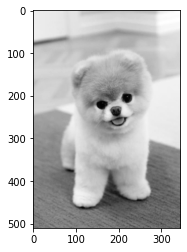

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(arr, cmap='gray')

Q. 이미지 Crop하기 (200, 200) 크기로 영상 자르기

(200, 200)


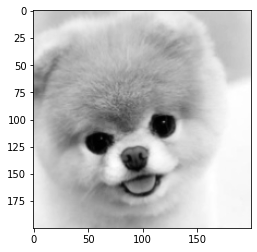

In [ ]:
# 코드를 작성하세요
# arr2 = arr[:200,:200]
arr2 = arr[100:300,100:300]
print(arr2.shape)
plt.imshow(arr2, cmap='gray')

200보다 큰 값을 255로 변환하라. 

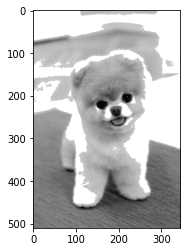

In [ ]:
arr3 = np.where(arr>200,255,arr)
arr3
plt.imshow(arr3, cmap='gray')

동일한 영상을 가로 방향으로 이어 붙여 출력하라.

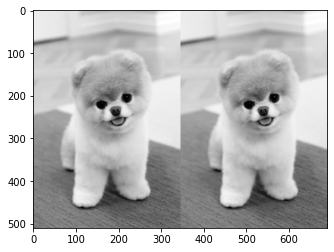

In [ ]:
arr_new = np.hstack((arr,arr))
arr_new
plt.imshow(arr_new, cmap='gray')

영상을 밝게 변경하라
- 영상의 밝기를 30 증가시키시오.

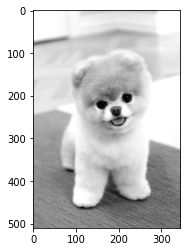

In [ ]:
x = []
for nums in arr:
    for i in nums:
        if i + 30 > 255:
            x.append(255)
        else:
            x.append(i+30)
arr4 = np.array(x).reshape(arr.shape)
arr4
plt.imshow(arr4, cmap='gray')

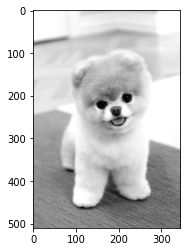

In [ ]:
arr8 = np.where(arr>(255-30),255,arr+30)
plt.imshow(arr8, cmap='gray')

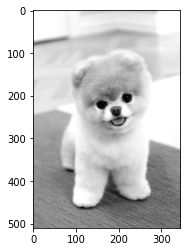

In [ ]:
arr6 = arr.astype('int64') + 30
arr6 = np.where(arr6>255,255,arr6)
arr6 = arr6.astype('uint8')
plt.imshow(arr6, cmap='gray')

영상 회전 (90/180/270/360)  
`np.rot90`

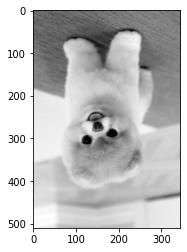

In [ ]:
rot_90 = np.rot90(arr)
arr_rot = np.rot90(arr,2) # 180도 https://stackoverflow.com/questions/47930428/how-to-rotate-an-array-by-%C2%B1-180-in-an-efficient-way
plt.imshow(arr_rot, cmap='gray')

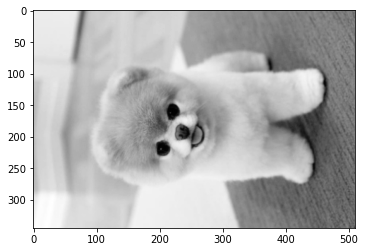

In [ ]:
arr_new = arr.transpose()
arr_new
plt.imshow(arr_new, cmap='gray')

영상의 반전
- 0 -> 255
- 255 -> 0
- 100 -> 155

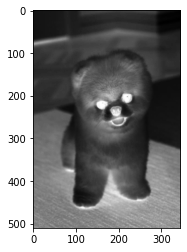

In [ ]:
a = []
for nums in arr:
    for i in nums:
        a.append(abs(i-255))
arr5 = np.array(a).reshape(arr.shape)
arr5
plt.imshow(arr5, cmap='gray')

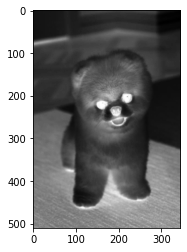

In [ ]:
arr7 = arr.astype('int64') - 255
arr7 = np.where(arr7<0,abs(arr7),arr7)
arr7 = arr7.astype('uint8')
plt.imshow(arr7, cmap='gray')

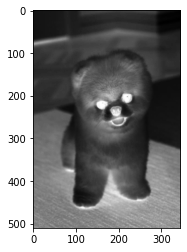

In [ ]:
arr9 = np.where(arr < 255, 255-arr,arr+255)
arr9
plt.imshow(arr9,cmap='gray')

영상의 합성

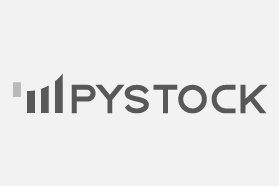

In [ ]:
from PIL import Image
logo = Image.open("/content/drive/MyDrive/001 Work/001_02 실습조교_패스트캠퍼스B2B/220516_교보생명/강의자료/data/1.png")
logo = logo.convert('L')
logo

In [ ]:
arr_logo = np.array(logo)
arr_logo
arr_logo[::2,::2]


array([[242, 242, 242, ..., 242, 242, 242],
       [242, 242, 242, ..., 242, 242, 242],
       [242, 242, 242, ..., 242, 242, 242],
       ...,
       [242, 242, 242, ..., 242, 242, 242],
       [242, 242, 242, ..., 242, 242, 242],
       [242, 242, 242, ..., 242, 242, 242]], dtype=uint8)

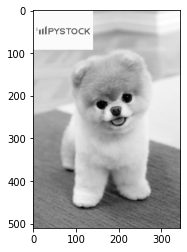

In [ ]:
new = arr.copy()
new[:93,:140] = arr_logo[::2,::2]
plt.imshow(new, cmap='gray')

In [126]:
width, height = img.size
 
# Setting the points for cropped image
left = 4
top = height / 5
right = 154
bottom = 3 * height / 5
 
# Cropped image of above dimension
# (It will not change original image)
im1 = img.crop((left, top, right, bottom))
newsize = (300, 300)
im1 = im1.resize(newsize)
# Shows the image in image viewer
im1
test = np.array(im1)
test.shape

(300, 300)

In [140]:
test = im1.resize(logo.size)
test
test_a = np.array(test)
test_a.shape, arr_logo.shape, logo.size

((186, 279), (186, 279), (279, 186))

(510, 345)

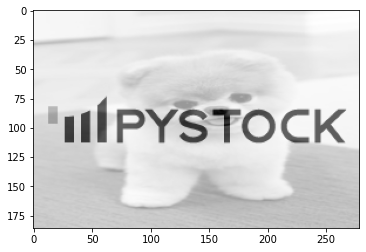

In [147]:
c = img.resize((279,186))
plt.imshow(c, cmap='gray')
plt.imshow(arr_logo, cmap='gray', alpha=0.6)
arr.shape